# Covid-19 (Coronavirus) 
## Tracker for Locations with Friends & Family

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### --PENDING-- US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hopspitalization, ICU stats --PENDING--
- **Historic time series data:**
    - US State testing and hopspitalization, ICU stats --PENDING--

### --PENDING-- US County - Alternative: NY Times
- Link: https://github.com/nytimes/covid-19-data/
- **Historic time series data:**
    - US States (cases, deaths) --PENDING--
    - US Counties (cases, deaths) --PENDING--

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns
sns.set()

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [2]:
jh_live_global = pd.read_csv('Datasets/JH/jh_live_global_orig.csv')

In [3]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [4]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [5]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [6]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [7]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [12]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

** PENDING **

### Dataset 3: New York Times (Alternative Historic US State & County data)

** PENDING **

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [13]:
jh_live_date = jh_live_global['Last_Update'][0]
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2020-05-11 00:00:00')

In [14]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2020-05-10 00:00:00')

In [15]:
# Date to zoom in on for charting recent data
zoom_date = '3/15/2020'
zoom_date2 = '3/20/2020'
zoom_date3 = '3/25/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [16]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,4101699
Deaths,282709
Recovered,1408980
Active,2410010


In [17]:
# Top countries by confirmed count as of latest date
top_countries = jh_live_countries.nlargest(25, 'Confirmed')
top_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,1329260,79526,216169,1033565,2020-05-11 02:32:30,38.175111,-91.151406
Spain,224350,26621,136166,61563,2020-05-11 02:32:30,40.463667,-3.749220
United Kingdom,220449,31930,1002,187517,2020-05-11 02:32:30,24.548173,-43.902242
Italy,219070,30560,105186,83324,2020-05-11 02:32:30,41.871940,12.567380
Russia,209688,1915,34306,173467,2020-05-11 02:32:30,61.524010,105.318756


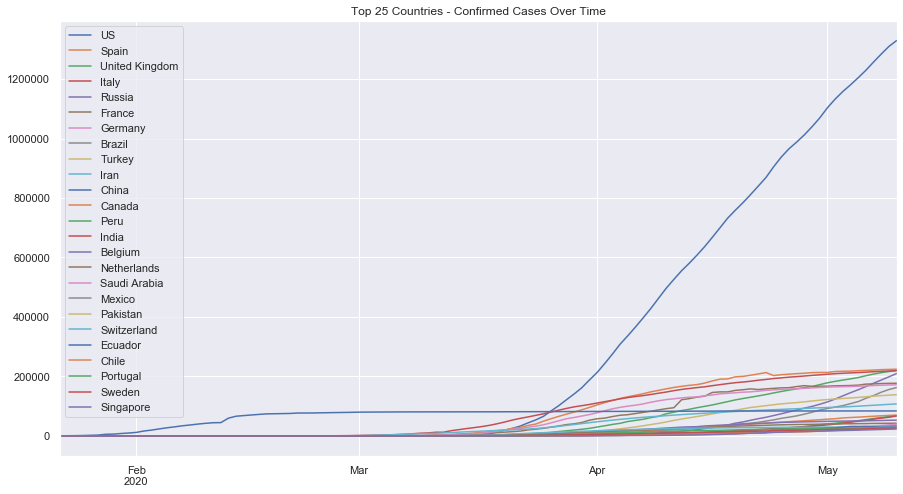

In [18]:
# Plot the top 25 countries confirmed infections over time
jh_hist_countries_cases[top_countries.index].plot(figsize=(15,8), title="Top 25 Countries - Confirmed Cases Over Time")

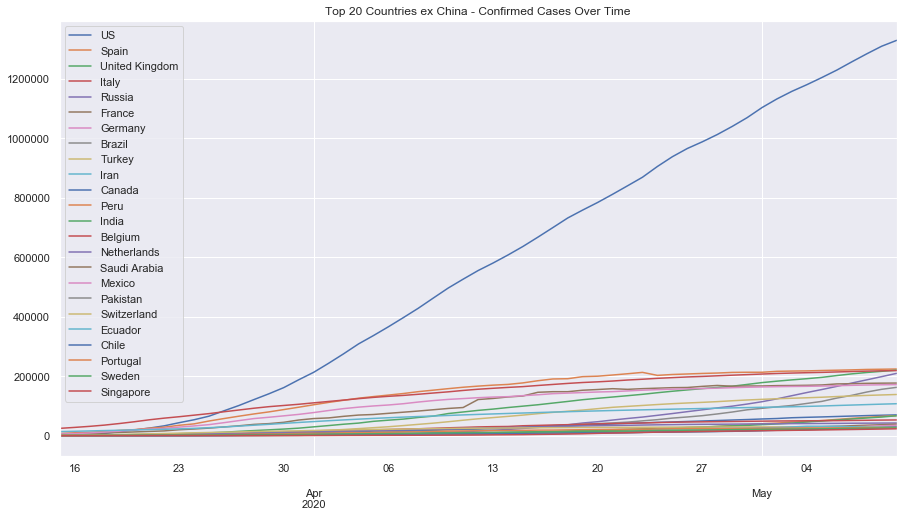

In [19]:
# Same chart but excluding China and starting on Mar 15 to zoom in
jh_hist_countries_cases[top_countries.index].loc[zoom_date:, top_countries.index != 'China'].plot(figsize=(15,8), title="Top 20 Countries ex China - Confirmed Cases Over Time")

### US State Level

In [20]:
# Top US States by confirmed cases
top_states = jh_live_usstates.nlargest(20, 'Confirmed')
top_states.head(10)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
New York,335395,26641,0,308754,2020-05-11 02:32:30,42.671593,-75.579694
New Jersey,138754,9256,0,129498,2020-05-11 02:32:30,40.286441,-74.622450
Massachusetts,77793,4979,0,72814,2020-05-11 02:32:30,42.176400,-71.577050
Illinois,77741,3406,0,74335,2020-05-11 02:32:30,39.848064,-89.189998
California,67600,2716,0,64884,2020-05-11 02:32:30,37.692907,-120.734916
Pennsylvania,59939,3806,0,56133,2020-05-11 02:32:30,40.818078,-77.615318
Michigan,47182,4555,0,42627,2020-05-11 02:32:30,43.942073,-85.081655
Florida,40596,1721,0,38875,2020-05-11 02:32:30,28.940755,-82.700744
Texas,39258,1094,0,38164,2020-05-11 02:32:30,31.664685,-98.314154


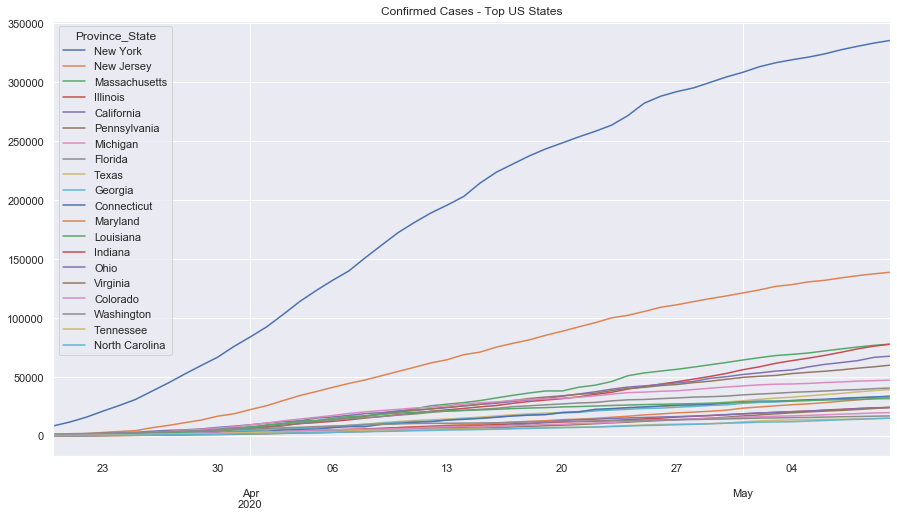

In [21]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date2:, top_states.index].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

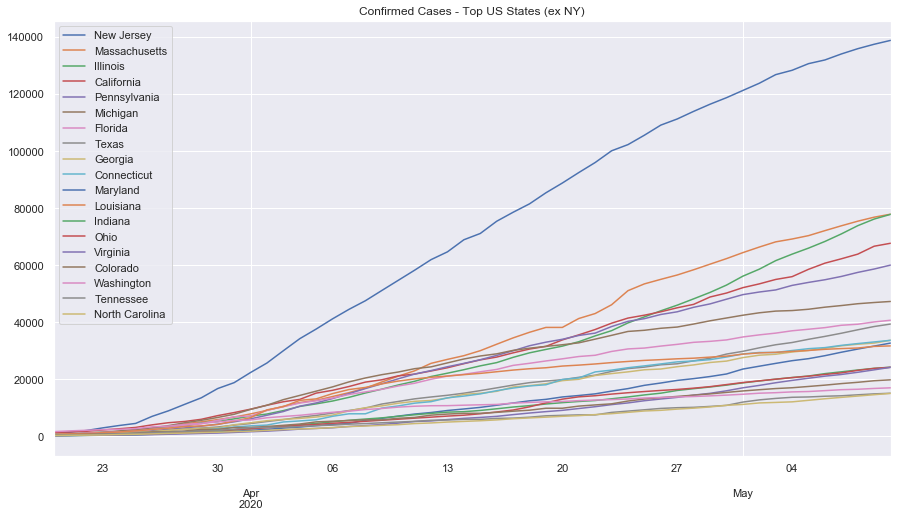

In [22]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_cases[top_states.index].loc[zoom_date2:, top_states.index != 'New York'].plot(title='Confirmed Cases - Top US States (ex NY)', figsize=(15,8))

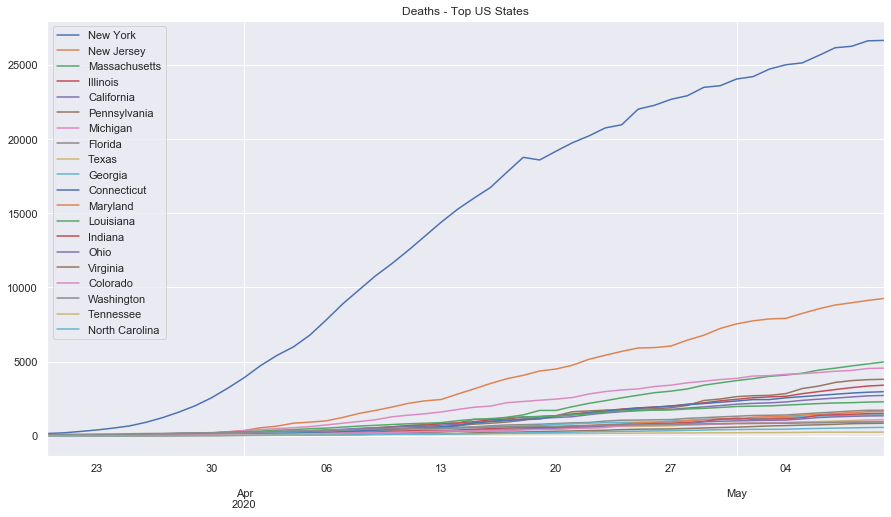

In [23]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_states.index].loc[zoom_date2:, :].plot(title='Deaths - Top US States', figsize=(15,8))

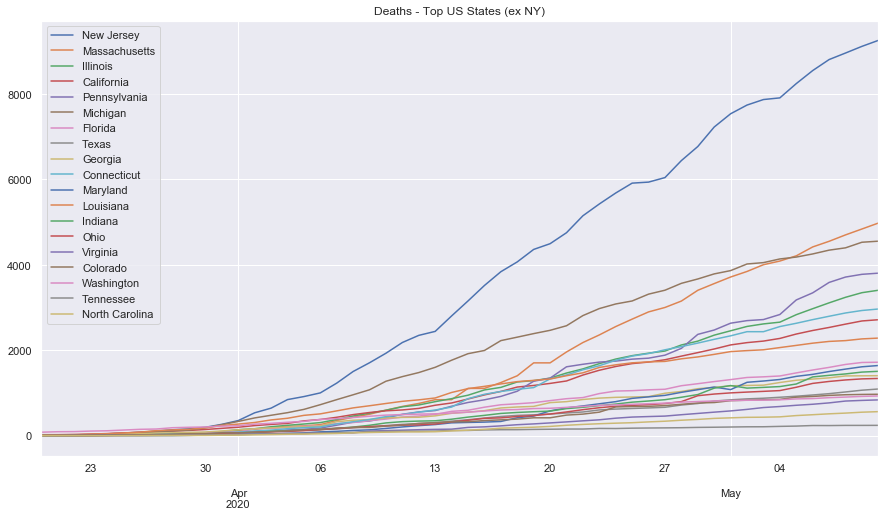

In [24]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_states.index].loc[zoom_date2:, top_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))

### US County Level

In [25]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(10, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Middlesex,17589,1207,0,16382,2020-05-11 02:32:30,42.486077,-71.390492,25017.0
Suffolk,15279,718,0,14561,2020-05-11 02:32:30,42.327951,-71.078504,25025.0
Essex,11353,644,0,10709,2020-05-11 02:32:30,42.668763,-70.946872,25009.0
Worcester,7743,444,0,7299,2020-05-11 02:32:30,42.350270,-71.904934,25027.0
Norfolk,6952,650,0,6302,2020-05-11 02:32:30,42.160731,-71.205304,25021.0


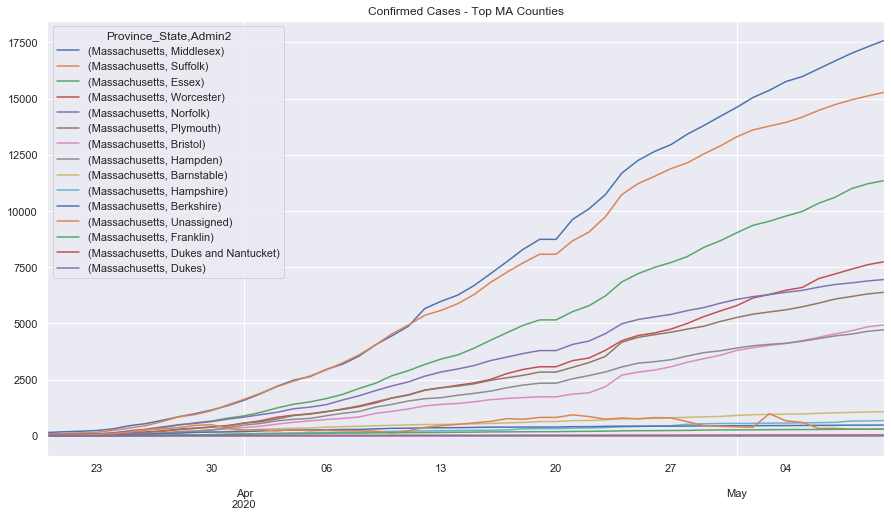

In [26]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(15).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

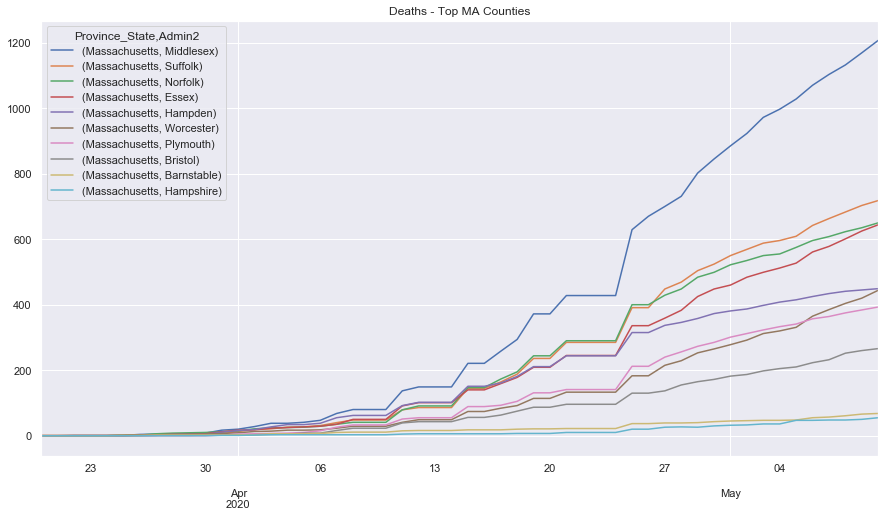

In [27]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(10).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [28]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(15, 'Confirmed')
top_counties_CA.head(7)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,31703,1531,0,30172,2020-05-11 02:32:30,34.308284,-118.228241,6037.0
Riverside,4992,204,0,4788,2020-05-11 02:32:30,33.743150,-115.993358,6065.0
San Diego,4776,175,0,4601,2020-05-11 02:32:30,33.034846,-116.736533,6073.0
Orange,3502,76,0,3426,2020-05-11 02:32:30,33.701475,-117.764600,6059.0
San Bernardino,2902,114,0,2788,2020-05-11 02:32:30,34.840603,-116.177469,6071.0
Santa Clara,2339,129,0,2210,2020-05-11 02:32:30,37.231049,-121.697046,6085.0
Alameda,2064,71,0,1993,2020-05-11 02:32:30,37.646294,-121.892927,6001.0


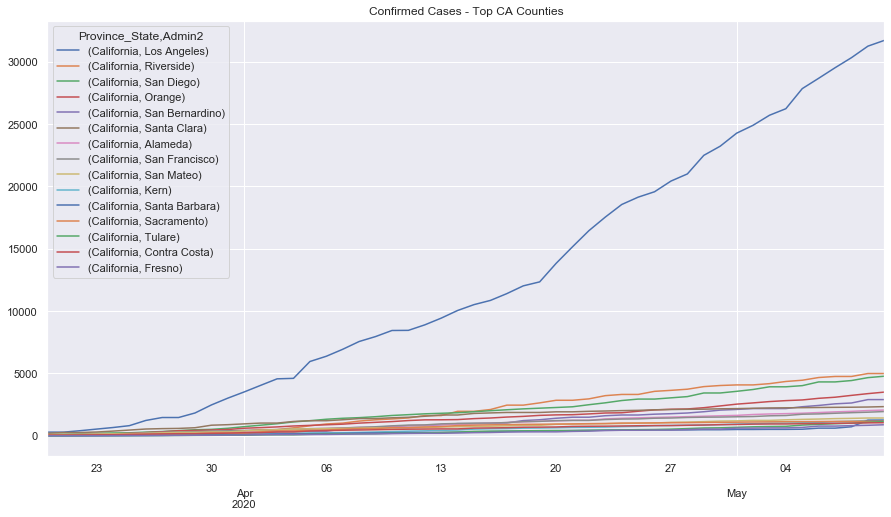

In [29]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

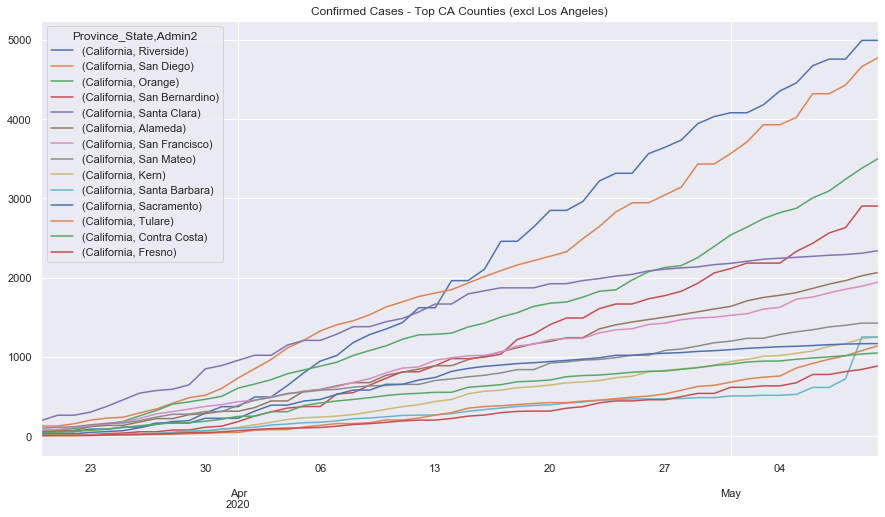

In [30]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

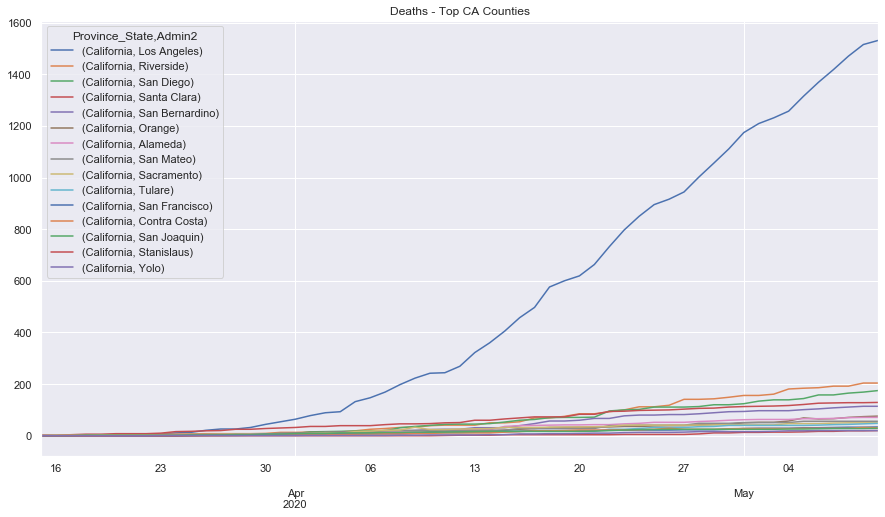

In [31]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

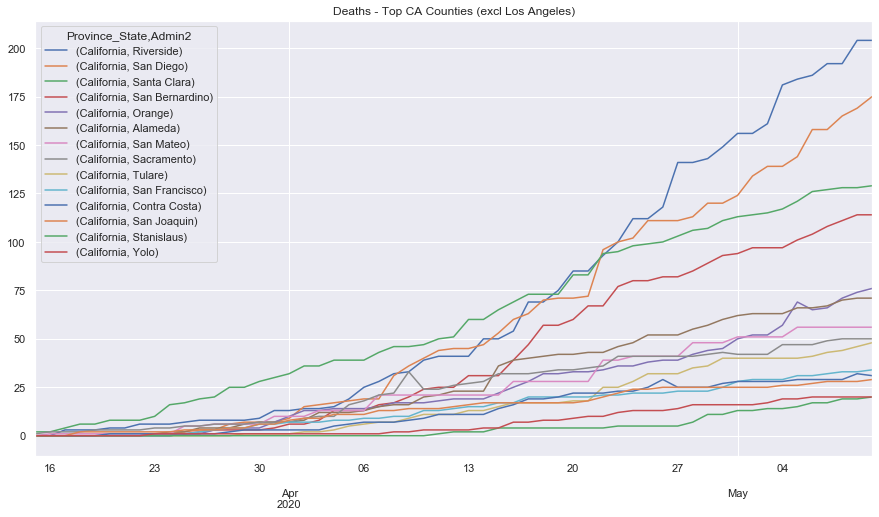

In [32]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### US Counties - Friends & Family

In [33]:
fnf_counties = [('California', 'Orange'), ('Massachusetts', 'Middlesex'), ('Massachusetts', 'Suffolk'), 
                ('Massachusetts', 'Essex'), ('Massachusetts', 'Bristol')]

#### Live stats for locations where friends and family live

In [34]:
# Add live stats from US Counties of friends & family
fnf_live = jh_live_uscounties.loc[fnf_counties, :]
fnf_live = fnf_live.drop('FIPS', axis=1)

In [35]:
# Add live stats from Costa Rica from the Countries dataset
fnf_cr = jh_live_countries.loc[['Costa Rica']]

In [36]:
# Merge Costa Rica data with US County data
fnf_live.loc[('Costa Rica')] = fnf_cr.loc[('Costa Rica')]

In [37]:
# Display all live data
fnf_live

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
"(California, Orange)",3502,76,0,3426,2020-05-11 02:32:30,33.701475,-117.764600
"(Massachusetts, Middlesex)",17589,1207,0,16382,2020-05-11 02:32:30,42.486077,-71.390492
"(Massachusetts, Suffolk)",15279,718,0,14561,2020-05-11 02:32:30,42.327951,-71.078504
"(Massachusetts, Essex)",11353,644,0,10709,2020-05-11 02:32:30,42.668763,-70.946872
"(Massachusetts, Bristol)",4931,266,0,4665,2020-05-11 02:32:30,41.792284,-71.108722
Costa Rica,792,7,501,284,2020-05-11 02:32:30,9.748900,-83.753400


#### Confirmed cases over time in locations where friends and family live

In [38]:
# Add confirmed cases from US Counties of friends & family
fnf_hist_cases = jh_hist_uscounties_cases.loc[:, fnf_counties ]

In [39]:
# Add confirmed cases in Costa Rica from the Countries dataset
fnf_hist_cases[('Costa Rica', '')] = jh_hist_countries_cases['Costa Rica']

In [40]:
# Check the most recent 8 days (week + start)
fnf_hist_cases.tail(8)

Province_State California Massachusetts                        Costa Rica
Admin2             Orange     Middlesex Suffolk  Essex Bristol           
2020-05-03           2743         15370   13777   9542    4019        739
2020-05-04           2819         15757   13941   9773    4103        742
2020-05-05           2873         15980   14173   9979    4235        755
2020-05-06           3004         16327   14476  10344    4380        761
2020-05-07           3092         16676   14732  10610    4529        765
2020-05-08           3240         17014   14944  10995    4670        773
2020-05-09           3380         17307   15119  11211    4847        780
2020-05-10           3502         17589   15279  11353    4931        792

In [41]:
# Sort in descending order
fnf_hist_cases.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

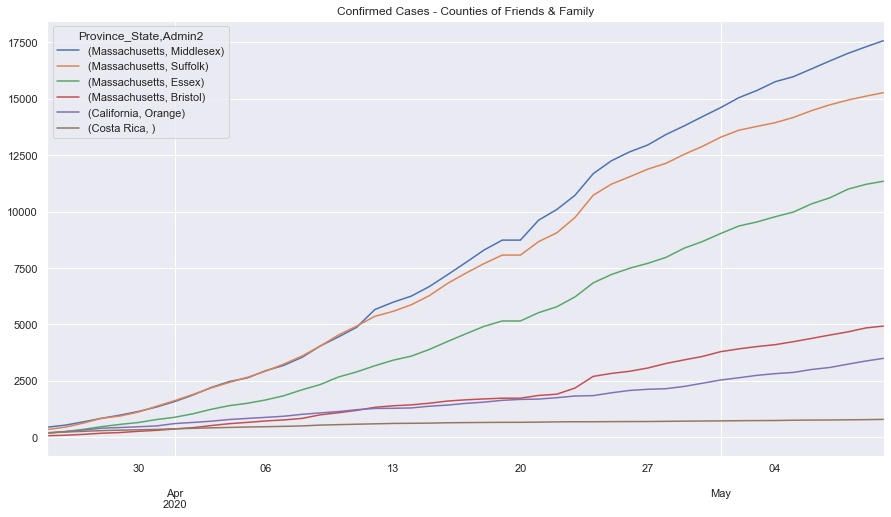

In [42]:
# Plot the data in a chart
fnf_hist_cases.loc[zoom_date3:,:].plot(title='Confirmed Cases - Counties of Friends & Family', figsize=(15,8))

#### Deaths over time in locations where friends and family live

In [43]:
# Add deaths from US Counties of friends & family
fnf_hist_deaths = jh_hist_uscounties_deaths.loc[:, fnf_counties ]

In [44]:
# Add MA "Unassigned" since there are days where deaths are flat on the County level while they are unassigned
fnf_hist_deaths[('Massachusetts', 'Unassigned')] = jh_hist_uscounties_deaths.loc[:, ('Massachusetts', 'Unassigned') ]

In [45]:
# Add deaths in Costa Rica from the Countries dataset
fnf_hist_deaths[('Costa Rica', '')] = jh_hist_countries_deaths['Costa Rica']

In [46]:
# Check the most recent 8 days (week + start)
fnf_hist_deaths.tail(8)

Province_State California Massachusetts                                   \
Admin2             Orange     Middlesex Suffolk Essex Bristol Unassigned   
2020-05-03             52           972     588   499     198          7   
2020-05-04             57           997     596   512     205          7   
2020-05-05             69          1028     609   527     210          7   
2020-05-06             65          1070     642   561     223          3   
2020-05-07             66          1103     663   578     232          3   
2020-05-08             71          1132     683   601     252          3   
2020-05-09             74          1169     703   625     260          3   
2020-05-10             76          1207     718   644     266          5   

Province_State Costa Rica  
Admin2                     
2020-05-03              6  
2020-05-04              6  
2020-05-05              6  
2020-05-06              6  
2020-05-07              6  
2020-05-08              6  
2020-05-09              6  
2020-05-10              7

In [47]:
# Sort in descending order
fnf_hist_deaths.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

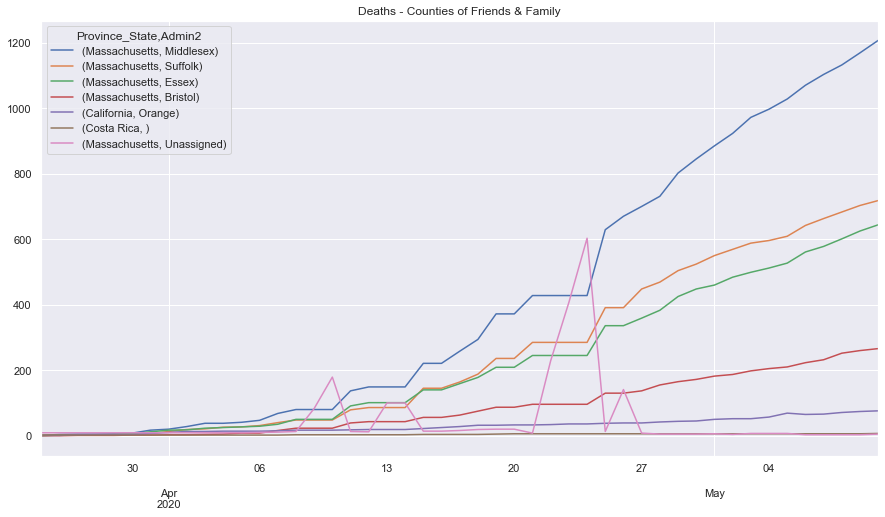

In [48]:
# Plot the data in a chart
fnf_hist_deaths.loc[zoom_date3:,:].plot(title='Deaths - Counties of Friends & Family', figsize=(15,8))